# Stock Prediction

## ABOUT THE DATA

#### We have three datasets consisting of the stock prices of three companies (Facebook, Amazon and Apple) from 2012 till March 2024.

#### The datasets have 6 columns - Date, Open, High, Low, Close, Adj Close and Volumear day.

#### IMPORTING LIBRARIES

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from pykalman import KalmanFilter
import PySimpleGUI as sg
import plotly.graph_objects as go
from datetime import datetime
tf.random.set_seed(7)

#### READING AND ANALYSING THE DATA

In [7]:
def price_fluct(company):
    
        kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                         initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
        mean, cov = kf.filter(company['Adj Close'].values)
        mean, std = mean.squeeze(), np.std(cov.squeeze())
        plt.figure(figsize=(12,6))
        plt.plot(company['Adj Close'].values - mean, 'red', lw=1.5)
        plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
        plt.title("Kalman filtered price fluctuation")
        plt.ylabel("Deviation from the mean ($)")
        plt.xlabel("Days")

# Interactive candlestick visualization of the company's stock data 
def candlestick_viz(company):
    
    fig = go.Figure(data=[go.Candlestick(x=Facebook['Date'],open=Facebook['Open'],high=Facebook['High'],
                low=Facebook['Low'], close=Facebook['Close'])])

    fig.show()

In [14]:
fb = pd.read_csv('Facebook.csv')
am = pd.read_csv('Apple.csv')
app = pd.read_csv('Apple.csv')

In [15]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [16]:
am.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,19.070000,19.407499,18.649286,18.942142,16.288403,732292400
1,2012-05-21,19.089287,20.055000,19.073214,20.045713,17.237370,631106000
2,2012-05-22,20.341070,20.495714,19.735001,19.891787,17.105009,694870400
3,2012-05-23,19.910713,20.457144,19.758215,20.377144,17.522364,584897600
4,2012-05-24,20.566786,20.589287,20.043928,20.190001,17.361441,496230000


In [17]:
app.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,19.070000,19.407499,18.649286,18.942142,16.288403,732292400
1,2012-05-21,19.089287,20.055000,19.073214,20.045713,17.237370,631106000
2,2012-05-22,20.341070,20.495714,19.735001,19.891787,17.105009,694870400
3,2012-05-23,19.910713,20.457144,19.758215,20.377144,17.522364,584897600
4,2012-05-24,20.566786,20.589287,20.043928,20.190001,17.361441,496230000


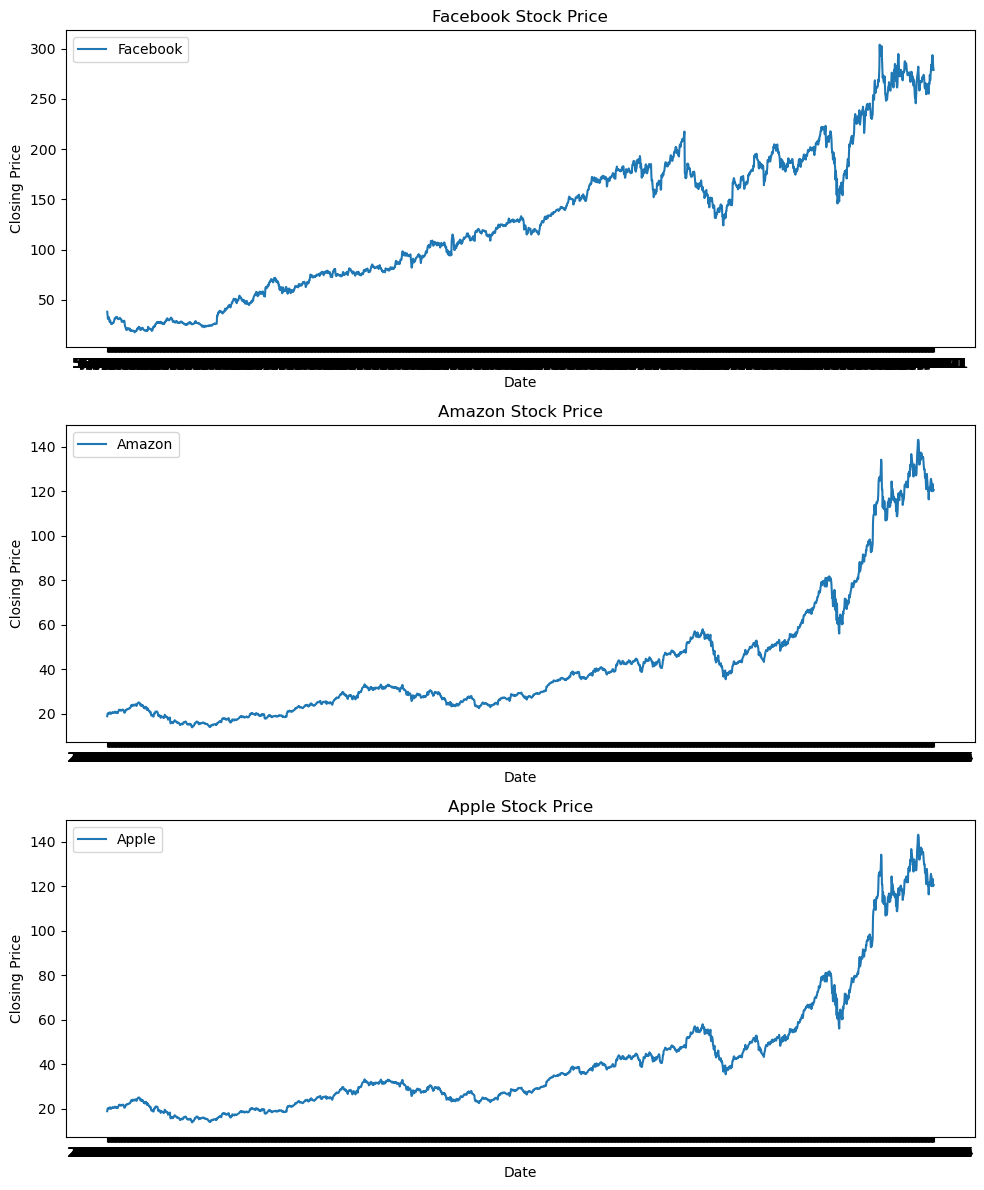

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot closing prices for each company
axs[0].plot(fb['Date'], fb['Close'], label='Facebook')
axs[1].plot(am['Date'], am['Close'], label='Amazon')
axs[2].plot(app['Date'], app['Close'], label='Apple')

# Set titles and labels
axs[0].set_title('Facebook Stock Price')
axs[1].set_title('Amazon Stock Price')
axs[2].set_title('Apple Stock Price')
for ax in axs:
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

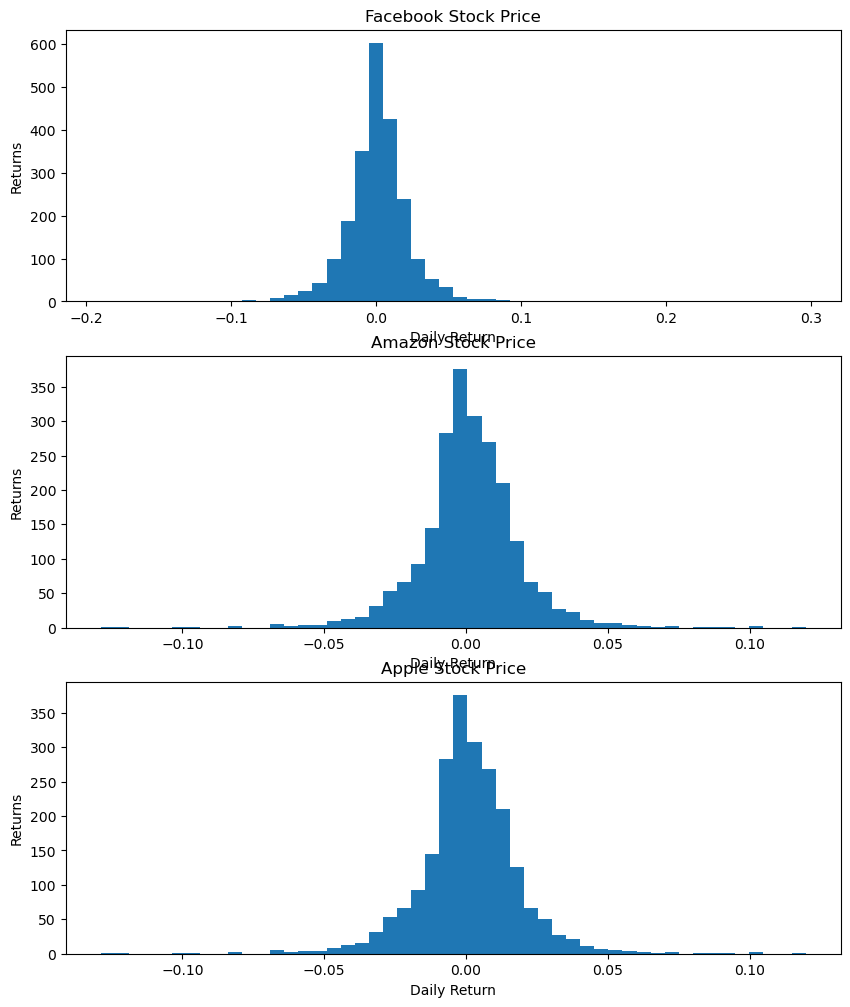

In [29]:
fb['DailyReturn'] = fb['Close'].pct_change()
am['DailyReturn'] = am['Close'].pct_change()
app['DailyReturn'] = app['Close'].pct_change()

# Create histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 12))
axs[0].hist(fb['DailyReturn'], bins=50)
axs[1].hist(am['DailyReturn'], bins=50)
axs[2].hist(app['DailyReturn'], bins=50)
axs[0].set_title('Facebook Stock Price')
axs[1].set_title('Amazon Stock Price')
axs[2].set_title('Apple Stock Price')
for ax in axs:
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Returns')

plt.show()

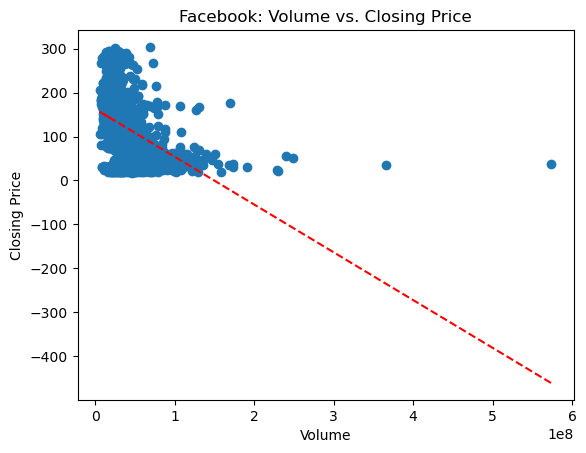

In [24]:
plt.scatter(fb['Volume'], fb['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Facebook: Volume vs. Closing Price')
# Add trendline (using a linear regression model)
z = np.polyfit(fb['Volume'], fb['Close'], 1)
m = z[0]
c = z[1]
p = np.poly1d([m, c])
plt.plot(fb['Volume'], p(fb['Volume']), 'r--')
plt.show()

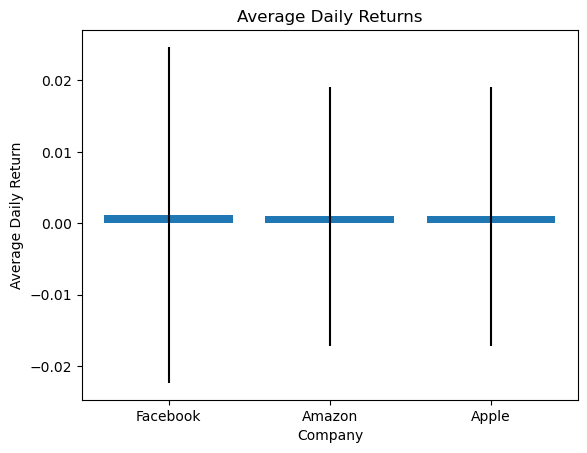

In [30]:
avg_returns = {
    'Facebook': fb['DailyReturn'].mean(),
    'Amazon': am['DailyReturn'].mean(),
    'Apple': app['DailyReturn'].mean()
}

# Create bar chart with error bars
plt.bar(avg_returns.keys(), avg_returns.values(), yerr=[fb['DailyReturn'].std(), am['DailyReturn'].std(), app['DailyReturn'].std()])
plt.xlabel('Company')
plt.ylabel('Average Daily Return')
plt.title('Average Daily Returns')
plt.show()

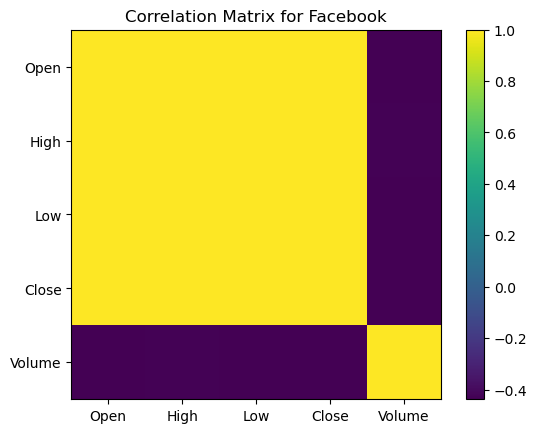

In [32]:
corr_matrix = fb[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Create heatmap
plt.imshow(corr_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix for Facebook')
plt.show()

In [36]:
class stock_predict_DL:
    
    def __init__(self,comp_df):
        # reseved method in python classes (Constructor)
        # We are taking only the Open prices for predicting 
        data = comp_df.filter(['Open'])
        dataset = data.values
        # We take 90% of the data for training and 10% for testing 
        training_data_len = int(np.ceil( len(dataset) * 0.90 ))
        # We are scaling the open prices to the range(0,1)
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)
        # Taking the first 90% of the dataset for training 
        train_data = scaled_data[0:int(training_data_len), :]
        # Split the data into self.X_train and self.y_train data sets
        self.X_train = []
        self.y_train = []
        
        # We are taking predicting the open price of a given day based on the trend in the previous 60 days
        for i in range(60, len(train_data)):
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i, 0])

        # Convert the self.X_train and self.y_train to numpy arrays 
        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)

        # Create the testing data set
        # Create a new array containing scaled values from index 1543 to 2002 
        test_data = scaled_data[training_data_len - 60: , :]
        # Create the data sets self.X_test and self.y_test
        self.X_test = []
        # Rmaining 10% of the data needs to be given for testing 
        self.y_test = dataset[training_data_len:, :]
        for i in range(60, len(test_data)):
            self.X_test.append(test_data[i-60:i, 0])
        self.X_test = np.array(self.X_test)
        test_dates = comp_df['Date'].values
        self.testd = test_dates[training_data_len:] # stores the test dates
        # List to store the R2 scores of all the models to get the best model at the end
        self.model_score = []
         
    def LSTM_model(self):
        
        print("Long Short-Term Memory (LSTM)")
        # Reshape the data
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
        # Reshape the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        # Build the LSTM model
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(32))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        # We are adding dropout to reduce overfitting 
        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')
        # Train the model
        model.fit(Xtrain, self.y_train, batch_size=1, epochs= 1)
         # Get the models predicted price values 
        predictions = model.predict(Xtest)
        # We need to inverse transform the scaled data to compare it with our unscaled y_test data
        predictions = self.scaler.inverse_transform(predictions)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, predictions))
        self.model_score.append(["LSTM",metrics.r2_score(self.y_test, predictions)])
        # Mean squared logarithmic error (MSLE) can be interpreted as a measure of the
        # ratio between the true and predicted values.
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, predictions))
        plt.plot(predictions)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("LSTM")
    

In [37]:
sg.theme("DarkTeal2")
layout = [[sg.T("")], [sg.Text("Choose a file (.csv): "), sg.Input(), sg.FileBrowse(key="-IN-")],[sg.Button("Select")]]

#Building Window
window = sg.Window('Stock Dataset Browser', layout, size=(600,150))
# If user presses select buttom then store the file path
# After selecting it, it closes the pop-up
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Exit":
        break
    elif event == "Select":
        print(values["-IN-"])
        filepath = values["-IN-"]
        window.close()

C:/Users/Aryan/Projects/code Alpha/Task 2/Facebook.csv


In [40]:
folder = 'C:/Users/Aryan/OneDrive/Desktop/Intern/Code Aplha/Task 3/'
# reading the csv file that was selected and printing the file name 
data = pd.read_csv(filepath)
comp_name = filepath.replace(folder,"")
comp_name = comp_name.replace('.csv',"")
print("Company " + comp_name + "'s stocks chosen")

Company C:/Users/Aryan/Projects/code Alpha/Task 2/Facebook's stocks chosen


In [41]:
company_stock = stock_predict_DL(data)

Long Short-Term Memory (LSTM)


C:\Users\Aryan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1945/1945 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - loss: 0.0066
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
R2 SCORE
-0.10365148264712021
MSLE
0.0073285707197810294


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (222).

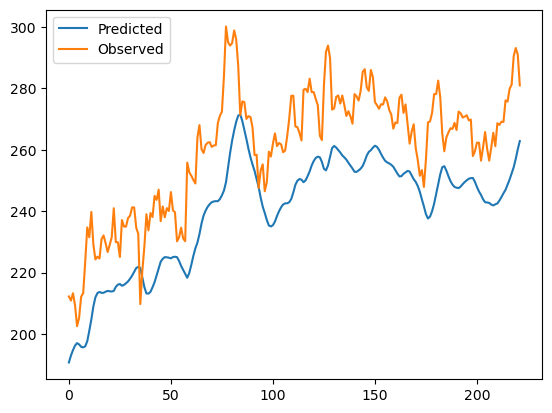

In [42]:
company_stock.LSTM_model()